In [256]:
#importing required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [257]:
#reading the csv files from last Analysis assignment
df = pd.read_csv('df.csv')
gdp_yearly = pd.read_csv('gdp_yearly.csv')
mean_yearly = pd.read_csv('mean_yearly.csv')
means = pd.read_csv('means.csv')
stats = pd.read_csv('stats.csv')

In [258]:
#Getting France, USA and Bangladesh data for subplot#2
df_france = df[df['country'] == 'FRA']
df_USA = df[df['country'] == 'USA']
df_bgd = df[df['country'] == 'BGD']

In [259]:
#Getting School Enrollment data for stacked bar chart i.e subplot#5
df_stack = means[['country','School Enrollment Primary','School Enrollment Secondary','School Enrollment Tartiary' ]]
df_stack.set_index('country', inplace=True)

In [260]:
#Getting CUrrent GDP and School Enrollment Unemp% for scatter plot
scatter =  means[['GDP Current', 'School Enrollment Unemp%']]

In [261]:
#rounding off mean data to 1 decimal place
means['GDP Current'] = means['GDP Current'].round(decimals = 1)

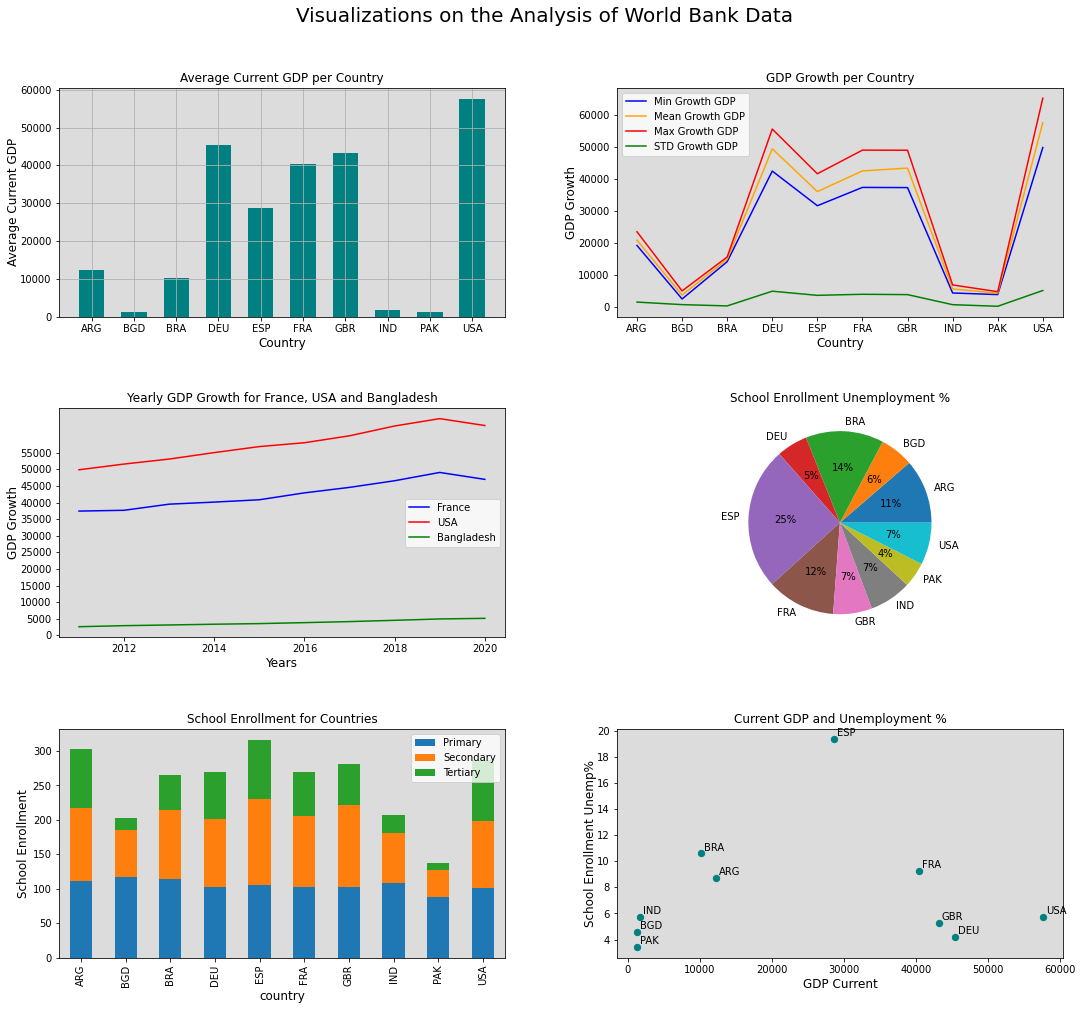

In [262]:
#creating figure
fig = plt.figure(figsize =([18, 16]))

#creating the grid 
gs = GridSpec(3, 6)
gs.update(wspace = 1.5, hspace = 0.4)

#---------------------------#
#bar chart for Average Current GDP per Country 
#first subplot
ax1 = plt.subplot(gs[0, :3])
#setting x label
ax1.set_ylabel('Average Current GDP', labelpad = 0, fontsize = 12,color='black')
#setting y label
ax1.set_xlabel('Country', labelpad = 3, fontsize = 12,color='black')
#setting title
ax1.set_title('Average Current GDP per Country',
             fontsize = 12,color='black')
#custom background grid
ax1.grid(zorder=0)
#bar chart with custom color and custom width
ax1.bar(means['country'], means['GDP Current'], color='teal', width=0.6)


#---------------------------#
#Line Plot GDP Growth per Country
#second subplot
ax2 = plt.subplot(gs[0, 3:6])
#y label
ax2.set_ylabel('GDP Growth', labelpad = 0, fontsize = 12,color='black')
#x label
ax2.set_xlabel('Country', labelpad = 3, fontsize = 12,color='black')
#title
ax2.set_title('GDP Growth per Country',
             fontsize = 12,color='black')
#plot with custom colors and a legend
ax2.plot(stats['country'], stats['Min Growth GDP'], color='blue')
ax2.plot(stats['country'], stats['Mean Growth GDP'], color='orange')
ax2.plot(stats['country'], stats['Max Growth GDP'], color='red')
ax2.plot(stats['country'], stats['std Growth GDP'], color='green')
ax2.legend(['Min Growth GDP', 'Mean Growth GDP', 'Max Growth GDP','STD Growth GDP'])



#---------------------------#
#yearly GDP Growth for France, USA, BGD
#third subplot
ax3 = plt.subplot(gs[1, :3])
#y label
ax3.set_ylabel('GDP Growth', labelpad = 0, fontsize = 12,color='black')
#x label
ax3.set_xlabel('Years', labelpad = 3, fontsize = 12,color='black')
#title
ax3.set_title('Yearly GDP Growth for France, USA and Bangladesh',
             fontsize = 12,color='black')
#line plots with custom color and custim axis
ax3.plot(df_france['year'], df_france['GPD Growth'], color='blue')
ax3.plot(df_USA['year'], df_USA['GPD Growth'], color='red')
ax3.plot(df_bgd['year'], df_bgd['GPD Growth'], color='green')
ax3.legend(['France', 'USA', 'Bangladesh'])
ax3.set_yticks(np.arange(0, 60000, 5000))



#---------------------------#
#pie chart 
#fourth subplot
ax4 = plt.subplot(gs[1, 3:6])
#title
ax4.set_title('School Enrollment Unemployment %',
             fontsize = 12,color='black')
#pie chart
ax4.pie(means['School Enrollment Unemp%'], labels = means['country'],autopct='%1.0f%%',textprops={'color':"black"})



#---------------------------#
#stacked bar chart for school enrollment 
#fifth subplot
ax5 = plt.subplot(gs[2, :3])
#y label
ax5.set_ylabel('School Enrollment', labelpad = 3, fontsize = 12,color='black')
#x label
ax5.set_xlabel('Country', labelpad = 3, fontsize = 12,color='black')
#title
ax5.set_title('School Enrollment for Countries',
             fontsize = 12, color='black')
#stacked bar plot with legend
df_stack.plot.bar(stacked=True, ax=ax5)
ax5.legend(['Primary', 'Secondary', 'Tertiary'])



#---------------------------#
#sixth subplot
ax6 = plt.subplot(gs[2, 3:6])
#y label
ax6.set_ylabel('School Enrollment Unemp%', labelpad = 0, fontsize = 12, color='black')
ax6.set_xlabel('GDP CUrrent', labelpad = 3, fontsize = 12, color='black')
#x title
ax6.set_title('Current GDP and Unemployment %',
             fontsize = 12,color='black')
#scatter plot with custom dot size and custom color
scatter.plot.scatter(x = 'GDP Current', y = 'School Enrollment Unemp%', s=40, c = 'teal', ax = ax6);

#annotating the scatter plot
x = scatter['GDP Current'].values
y = scatter['School Enrollment Unemp%'].values
types = means.reset_index()['country'].values
for i, t in enumerate(types):
    ax6.annotate(t, (x[i], y[i]), xytext=(3,3), textcoords='offset points')

#title for the visualization
fig.suptitle('Visualizations on the Analysis of World Bank Data', fontsize=20, y=.95, color='black')

#background color for the visualization
fig.set_facecolor('white')

#custom axis colors and background color for the subplots
def tick_c(axs):
  for c in axs:
    c.tick_params(axis='x', colors='black')
    c.tick_params(axis='y', colors='black')
    c.set_facecolor('gainsboro')


a = [ax1,ax2,ax3,ax4,ax5,ax6]
tick_c(a)

plt.show()

The above dashboard displays the analysis results conducted on the world bank data. 

In the first visualization, the average current GDP per country has been displayed via a bar chart. USA has the highest whereas Bangladesh and Pakistan have the lowest.

The second visualization depicts the GDP growth per country. This includes four different lines for Minimun, Maximum, Average and Standard Deviation GDP  Growth.

The third visualizaton is a line plot for the yearly gdp growth for France, USA and Bangladesh. This relates to the second subplot which showed the GDP growth for the countries. It has been further drilled down for these three countries on year-to-year basis.

The pie chart visualizes the school enrollment employment percentage for each country in the dataset. Paksitan has the lowest school enrollment % at 4% whereas spain has the highest at 25%

The fifth visualization drills down the data displayed in the pie chaet to secondary, primary and tertiary level. It is a stacked bar chart that depicts the number of school enrollments in primary, secondary and tertiary schools with respect to each country.

Finally, the last visualization is a scatter plot. This was plotted to find out if there is any possible relation in current GDP and Unemployment percentage. No clear relationship between the two was observed.

In [254]:
#save as pdf
fig.savefig("dashboard.pdf", format="pdf", bbox_inches="tight")
